In [428]:
#1 school — аббревиатура школы, в которой учится ученик
#2 sex — пол ученика ('F' - женский, 'M' - мужской)
#3 age — возраст ученика (от 15 до 22)
#4 address — тип адреса ученика ('U' - городской, 'R' - за городом)
#5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)
#6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
#7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
#8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
#9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
#10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
#11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
#12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
#13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
#14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
#15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
#16 schoolsup — дополнительная образовательная поддержка (yes или no)
#17 famsup — семейная образовательная поддержка (yes или no)
#18 paid — дополнительные платные занятия по математике (yes или no)
#19 activities — дополнительные внеучебные занятия (yes или no)
#20 nursery — посещал детский сад (yes или no)
#21 higher — хочет получить высшее образование (yes или no)
#22 internet — наличие интернета дома (yes или no)
#23 romantic — в романтических отношениях (yes или no)
#24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
#25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
#26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
#27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
#28 absences — количество пропущенных занятий
#29 score — баллы по госэкзамену по математике

In [429]:
#импортируем нужные для чтения и первичного анализа библиотеки и прочитаем файл
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud_first = pd.read_csv('stud_math.csv')

In [430]:
#Рассмотрим, какие данные хранятся в файле и какие типы данных у столбцов:
display(stud_first.head(10))
stud_first.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [431]:
#Удаляем лишний столбец studytime, granular
stud_first = stud_first.loc[:, ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score']]

#Посмотрим, как изменился датасет
display(stud_first.head(10))
stud_first.info() 

#в датасете числовых столбцов 12, строковых 17

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     378 non-null    object 
 4   famsize     368 non-null    object 
 5   Pstatus     350 non-null    object 
 6   Medu        392 non-null    float64
 7   Fedu        371 non-null    float64
 8   Mjob        376 non-null    object 
 9   Fjob        359 non-null    object 
 10  reason      378 non-null    object 
 11  guardian    364 non-null    object 
 12  traveltime  367 non-null    float64
 13  studytime   388 non-null    float64
 14  failures    373 non-null    float64
 15  schoolsup   386 non-null    object 
 16  famsup      356 non-null    object 
 17  paid        355 non-null    object 
 18  activities  381 non-null    object 
 19  nursery     379 non-null    o

In [432]:
#Мы видим, что количество пустых значений в каждом столбце датасета не превышает 7%,
#поэтому нет необходимости удалять какие-то из стоблцов полностью
#Попробуем удалить строки с пустыми значениями

stud_drop = stud_first.copy()
#Удалим пустые значения во всех колонках,в которых есть пропуски, кроме score
stud_drop = stud_drop.dropna(axis=0, how='any', subset=['address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences'])

#Посмотрим, как изменился датасет
stud_drop.info() 
#Мы видим, что пустых значений нет, но количество строк всего 98, это слишком мало

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 4 to 391
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      98 non-null     object 
 1   sex         98 non-null     object 
 2   age         98 non-null     int64  
 3   address     98 non-null     object 
 4   famsize     98 non-null     object 
 5   Pstatus     98 non-null     object 
 6   Medu        98 non-null     float64
 7   Fedu        98 non-null     float64
 8   Mjob        98 non-null     object 
 9   Fjob        98 non-null     object 
 10  reason      98 non-null     object 
 11  guardian    98 non-null     object 
 12  traveltime  98 non-null     float64
 13  studytime   98 non-null     float64
 14  failures    98 non-null     float64
 15  schoolsup   98 non-null     object 
 16  famsup      98 non-null     object 
 17  paid        98 non-null     object 
 18  activities  98 non-null     object 
 19  nursery     98 non-null     ob

In [433]:
#Заменим пустые значения во всех колонках первичного датасета, кроме score
stud = stud_first.copy()
for column in stud.columns:
    if (stud[column].dtype == float) & (column.find('score') == -1):
        stud[column] = stud[column].fillna(stud[column].median())
    elif stud[column].dtype == object:
        stud[column] = stud[column].fillna(stud[column].mode()[0])

#Посмотрим, как изменился датасет
stud.info() 
#Мы видим, что заполнены все значения во всех строках для всех столбцов, кроме score
#Пустых значений нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     395 non-null    object 
 4   famsize     395 non-null    object 
 5   Pstatus     395 non-null    object 
 6   Medu        395 non-null    float64
 7   Fedu        395 non-null    float64
 8   Mjob        395 non-null    object 
 9   Fjob        395 non-null    object 
 10  reason      395 non-null    object 
 11  guardian    395 non-null    object 
 12  traveltime  395 non-null    float64
 13  studytime   395 non-null    float64
 14  failures    395 non-null    float64
 15  schoolsup   395 non-null    object 
 16  famsup      395 non-null    object 
 17  paid        395 non-null    object 
 18  activities  395 non-null    object 
 19  nursery     395 non-null    o

In [434]:
#рассмотрим все 29 столбцов по отдельности

#1 school — аббревиатура школы, в которой учится ученик
#Посмотрим, сколько школ содержит наш датасет.

pd.DataFrame(stud.school.value_counts())

#столбец содержит 2 уникальных значения

,school
GP,349
MS,46


In [435]:
#2 sex — пол ученика ('F' - женский, 'M' - мужской)

pd.DataFrame(stud.sex.value_counts())

#столбец содержит 2 уникальных значения

,sex
F,208
M,187


25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0,  21.0]


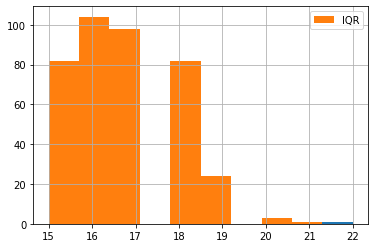

In [437]:
#3 age — возраст ученика (от 15 до 22)
#Этот столбец числовой. Поэтому посмотрим на его распределение:

stud.age.hist()
stud.age.describe()

#Большинство учашихся в возрасте от 16 до 18 лет (медиана 17, 25-й перцентиль 16 и 75-й — 18)
#Как видно, у этого признака распределение без аномалий, однако есть предположение о наличии выбросов по 75-ому перцентилю.
perc25 = stud.age.quantile(0.25)
perc75 = stud.age.quantile(0.75)
IQR = perc75 - perc25
f = perc25 - 1.5*IQR
l = perc75 + 1.5*IQR
print('25-й перцентиль: {},'.format(perc25),'75-й перцентиль: {},'.format(perc75),"IQR: {}, ".format(IQR),
"Границы выбросов: [{}, ".format(f), "{}]".format(l))
stud.age.loc[stud.age.between(f,l)].hist(bins = 10, range = (15, 22), label = 'IQR')
plt.legend();


count    390.000000
mean      16.646154
std        1.201081
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       19.000000
Name: age, dtype: float64

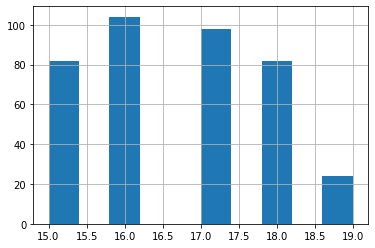

In [438]:
#Мы выяснили, что 22 - значение в зоне выбросов, однако значения 20,21 находяься практичеки на одном уровне,
#поэтому тоже исключим их из датасета:
stud = stud.loc[stud.age.between(15,19)]
stud.age.hist()
stud.age.describe()
#в датасете осталось 390 строк вместо 395

In [439]:
#4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

pd.DataFrame(stud.address.value_counts())

#Уникальных значений 2
#Мы выяснили, что подавляющее число учащихся живет в городе

,address
U,308
R,82


In [440]:
#5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

pd.DataFrame(stud.famsize.value_counts())

#Уникальных значений 2
#Мы выяснили, что учащихся с количеством членов семьи меньше 3 в два раза больше 

,famsize
GT3,284
LE3,106


In [441]:
#6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

pd.DataFrame(stud.Pstatus.value_counts())

#Уникальных значений 2
#Мы выяснили, что у большинства учащихся родители живут вместе

,Pstatus
T,356
A,34


     Medu
4.0   130
2.0   101
3.0    98
1.0    58
0.0     3


count    390.000000
mean       2.753846
std        1.094940
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

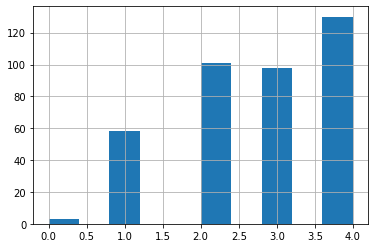

In [442]:
#7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
#Этот столбец числовой, но содержит пропуски. Посмотрим на его распределение:
print(pd.DataFrame(stud.Medu.value_counts()))
stud.Medu.hist()
stud.Medu.describe()

#Недопустимых значений нет
#Большее количество матерей имеюют высшее образование 

      Fedu
2.0    127
3.0     96
4.0     88
1.0     76
0.0      2
40.0     1


count    390.000000
mean       2.589744
std        2.175086
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

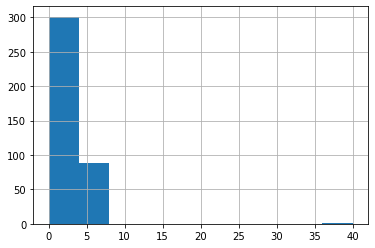

In [443]:
#8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
#Этот столбец числовой, но содержит пропуски. Посмотрим на его распределение:
print(pd.DataFrame(stud.Fedu.value_counts()))
stud.Fedu.hist()
stud.Fedu.describe()

     Fedu
2.0   127
3.0    96
4.0    88
1.0    76
0.0     2


count    389.000000
mean       2.493573
std        1.061551
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

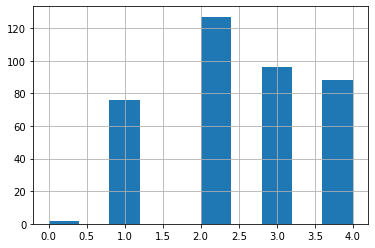

In [444]:
#Есть одно недопустимое значение, исключим его из датасета
stud = stud.loc[stud.Fedu.between(0,4)]
print(pd.DataFrame(stud.Fedu.value_counts()))
stud.Fedu.hist()
stud.Fedu.describe()

#В датасете осталось 389 строк
#Большее количество отцов имеюют  образование 5-9 классов
#Количество отцов с высшим образованием меньше, чем матерей

In [445]:
#9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

pd.DataFrame(stud.Mjob.value_counts())

#Уникальных значений 5
#Мы выяснили, что недопустимые значения отсутствуют

,Mjob
other,151
services,94
at_home,58
teacher,55
health,31


In [446]:
#10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

pd.DataFrame(stud.Fjob.value_counts())

#Уникальных значений 5
#Мы выяснили, что недопустимые значения отсутствуют

,Fjob
other,229
services,100
teacher,29
at_home,16
health,15


In [447]:
#11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

pd.DataFrame(stud.reason.value_counts())

#Уникальных значений 5
#Мы выяснили, что недопустимые значения отсутствуют

,reason
course,150
home,104
reputation,102
other,33


In [448]:
#12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

pd.DataFrame(stud.guardian.value_counts())

#Уникальных значений 3
#Мы выяснили, что недопустимые значения отсутствуют

,guardian
mother,277
father,85
other,27


     traveltime
1.0         266
2.0          95
3.0          21
4.0           7


count    389.000000
mean       1.406170
std        0.676988
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

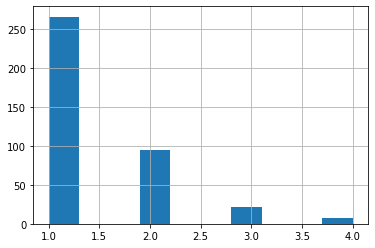

In [449]:
#13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
#Этот столбец числовой. Посмотрим на его распределение:
print(pd.DataFrame(stud.traveltime.value_counts()))
stud.traveltime.hist()
stud.traveltime.describe()

#Недопустимых значений нет
#У подавляющего большинства время до школы занимает менее 15 мин 

     studytime
2.0        200
1.0        100
3.0         62
4.0         27


count    389.000000
mean       2.041131
std        0.833175
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

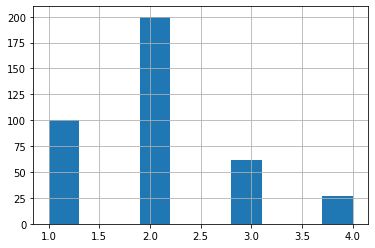

In [450]:
#14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
#Этот столбец числовой. Посмотрим на его распределение:
print(pd.DataFrame(stud.studytime.value_counts()))
stud.studytime.hist()
stud.studytime.describe()

#Недопустимых значений нет
#У подавляющего большинства время на учёбу помимо школы занимает 2-5 часов 

     failures
0.0       313
1.0        49
2.0        14
3.0        13


count    389.000000
mean       0.298201
std        0.694991
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

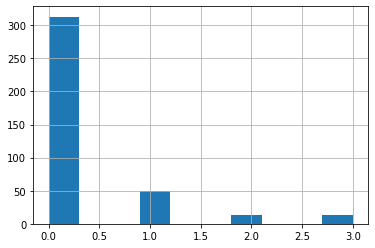

In [451]:
#15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
#Этот столбец числовой. Посмотрим на его распределение:
print(pd.DataFrame(stud.failures.value_counts()))
stud.failures.hist()
stud.failures.describe()

#Выбросов нет
#У подавляющего большинства количество внеучебных неудач либо больше 3, либо их не было 

In [452]:
#16 schoolsup — дополнительная образовательная поддержка (yes или no)

pd.DataFrame(stud.schoolsup.value_counts())

#Мы выяснили, что недопустимые значения отсутствуют, 
#подавляющее большинство учащихся не имеют дополнительной образовательной поддержки

,schoolsup
no,338
yes,51


In [453]:
#17 famsup — семейная образовательная поддержка (yes или no)

pd.DataFrame(stud.famsup.value_counts())

#Мы выяснили, что недопустимые значения отсутствуют, 
#учащихся имеющих семейную образовательную поддержку в два раза больше

,famsup
yes,255
no,134


In [454]:
#18 paid — дополнительные платные занятия по математике (yes или no)

pd.DataFrame(stud.paid.value_counts())

#Мы выяснили, что недопустимые значения отсутствуют, 
#учащихся имеющих дополнительные платные занятия по математике меньше

,paid
no,236
yes,153


In [455]:
#19 activities — дополнительные внеучебные занятия (yes или no)

pd.DataFrame(stud.activities.value_counts())

#Мы выяснили, что недопустимые значения отсутствуют, 
#учащихся имеющих и не имеющих дополнительные внеучебные занятия примерно равное количество

,activities
yes,207
no,182


In [456]:
#20 nursery — посещал детский сад (yes или no)

pd.DataFrame(stud.nursery.value_counts())

#Мы выяснили, что недопустимые значения отсутствуют, 
#Подавляющее большинство учащихся посещали детский сад

,nursery
yes,313
no,76


In [457]:
#21 higher — хочет получить высшее образование (yes или no)

pd.DataFrame(stud.higher.value_counts())

#Мы выяснили, что недопустимые значения отсутствуют, 
#Подавляющее большинство учащихся хочет получить высшее образование

,higher
yes,371
no,18


In [458]:
#22 internet — наличие интернета дома (yes или no)

pd.DataFrame(stud.internet.value_counts())

#Мы выяснили, что недопустимые значения отсутствуют, 
#У подавляющего большинства учащихся есть наличие интернета дома

,internet
yes,336
no,53


In [459]:
#23 romantic — в романтических отношениях (yes или no)

pd.DataFrame(stud.romantic.value_counts())

#Мы выяснили, что недопустимые значения отсутствуют, 
#Учащихся в романтических отношениях в два раза меньше

,romantic
no,267
yes,122


In [460]:
#24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
print(pd.DataFrame(stud.famrel.value_counts()))


      famrel
 4.0     209
 5.0      93
 3.0      62
 2.0      17
 1.0       7
-1.0       1


count    388.000000
mean       3.938144
std        0.857428
min        1.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: famrel, dtype: float64

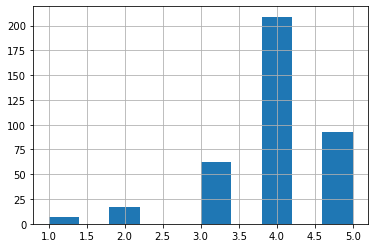

In [461]:
#Есть одно недопустимое значение, исключим его из датасета
stud = stud.loc[stud.famrel.between(1,5)]
stud.famrel.hist()
stud.famrel.describe()

#В датасете осталось 388 строк
#Мы выяснили, что у большинства учащихся семейные отношениях в интервале от 4 до 5 - хорошо и очень хорошо

     freetime
3.0       164
4.0       110
2.0        61
5.0        35
1.0        18


count    388.000000
mean       3.213918
std        0.971486
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

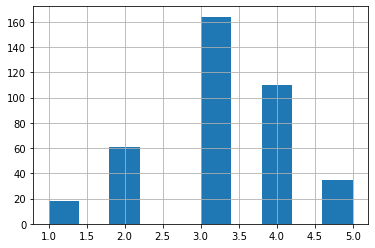

In [462]:
#25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
print(pd.DataFrame(stud.freetime.value_counts()))
stud.freetime.hist()
stud.freetime.describe()

#Числовое значение, не содержит выбросов
#Мы выяснили, что у большинства учащихся свободного времени после школы достаточно или много.

     goout
3.0    132
2.0     99
4.0     83
5.0     51
1.0     23


count    388.000000
mean       3.103093
std        1.106565
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

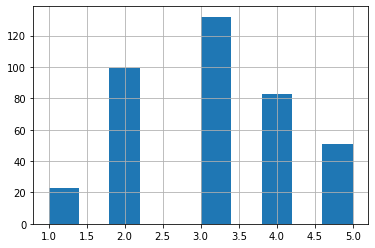

In [463]:
#26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
print(pd.DataFrame(stud.goout.value_counts()))
stud.goout.hist()
stud.goout.describe()

#Числовое значение, не содержит выбросов
#Мы выяснили, что у большинства учащихся времени проведения с друзьями немного.

     health
5.0     136
3.0      87
4.0      76
1.0      46
2.0      43


count    388.000000
mean       3.548969
std        1.373494
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

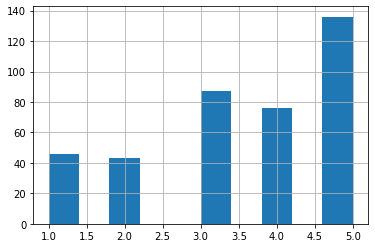

In [464]:
#27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
print(pd.DataFrame(stud.health.value_counts()))
stud.health.hist()
stud.health.describe()

#Числовое значение, не содержит выбросов
#Мы выяснили, что у большинства учащихся текущее состояние здоровья неплохое.

       absences
0.0         110
4.0          63
2.0          60
6.0          31
8.0          21
10.0         17
12.0         12
14.0         11
3.0           7
16.0          6
7.0           6
18.0          5
5.0           5
20.0          4
22.0          3
1.0           3
9.0           3
11.0          2
13.0          2
15.0          2
25.0          1
54.0          1
385.0         1
26.0          1
56.0          1
24.0          1
17.0          1
21.0          1
75.0          1
30.0          1
19.0          1
38.0          1
40.0          1
23.0          1
28.0          1


count    388.000000
mean       6.657216
std       20.847013
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

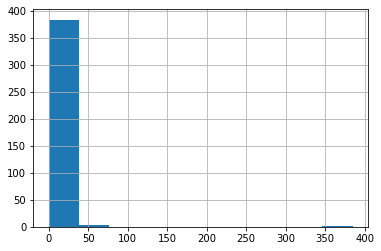

In [465]:
#28 absences — количество пропущенных занятий
print(pd.DataFrame(stud.absences.value_counts()))
stud.absences.hist()
stud.absences.describe()

#У большинства учашихся количество пропущенных занятий от 0 до 8 лет (медиана 4, 25-й перцентиль 0 и 75-й — 8)



25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Граница выброса: 20.0
      absences
0.0        110
4.0         63
2.0         60
6.0         31
8.0         21
10.0        17
12.0        12
14.0        11
3.0          7
16.0         6
7.0          6
18.0         5
5.0          5
20.0         4
1.0          3
9.0          3
11.0         2
13.0         2
15.0         2
19.0         1
17.0         1
<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      372 non-null    object 
 1   sex         372 non-null    object 
 2   age         372 non-null    int64  
 3   address     372 non-null    object 
 4   famsize     372 non-null    object 
 5   Pstatus     372 non-null    object 
 6   Medu        372 non-null    float64
 7   Fedu        372 non-null    float64
 8   Mjob        372 non-null    object 
 9   Fjob        372 non-null    obje

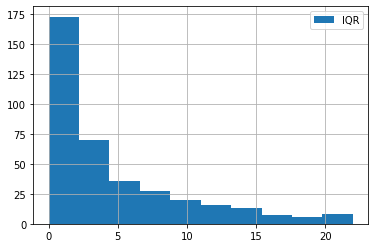

In [466]:
#Как видно, у этого признака есть наличие выбросов.
perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)
IQR = perc75 - perc25
l = perc75 + 1.5*IQR
print('25-й перцентиль: {},'.format(perc25),'75-й перцентиль: {},'.format(perc75),"IQR: {}, ".format(IQR),
"Граница выброса: {}".format(l))
stud.absences.loc[stud.age.between(0,l)].hist(bins = 10, range = (0, 22), label = 'IQR')
plt.legend();

#Отфильтруем данные:
stud = stud.loc[stud.absences.between(0,l)]
print(pd.DataFrame(stud.absences.value_counts()))
stud.info()
#В датасете осталось 372 строки

       score
50.0      54
55.0      42
0.0       37
75.0      32
65.0      30
60.0      30
70.0      27
40.0      26
45.0      23
80.0      16
30.0      14
90.0       9
35.0       8
25.0       7
95.0       5
85.0       5
100.0      1


count    366.000000
mean      52.158470
std       23.107539
min        0.000000
25%       41.250000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

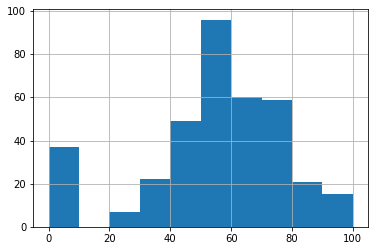

In [467]:
#29 score — баллы по госэкзамену по математике
#score — важный столбец, так как именно баллы по госэкзамену по математике будет учиться предсказывать будущая модель.
#Изучим данные:
print(pd.DataFrame(stud.score.value_counts()))

#Посмотрим на распределение оценок:
stud.score.hist()
stud.score.describe()

#Как видно, у этого признака распределение без аномалий, выбросов нет
#У большинства учашихся количество баллов распределено в диапазоне от 45 до 65 (медиана 55, 25-й перцентиль 45 и 75-й — 65)


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.193084,-0.144987,0.112164,0.019032,0.146210,0.019699,0.000006,0.136991,-0.041522,0.145685,-0.181578
Medu,-0.193084,1.000000,0.601524,-0.176659,0.090075,-0.260008,-0.017780,0.045655,0.049979,-0.045454,0.067700,0.212206
Fedu,-0.144987,0.601524,1.000000,-0.137652,-0.000121,-0.261356,-0.016047,-0.003403,0.045686,0.002961,-0.017659,0.120380
traveltime,0.112164,-0.176659,-0.137652,1.000000,-0.101587,0.073100,-0.027176,0.009458,0.053236,-0.046430,-0.031031,-0.060003
studytime,0.019032,0.090075,-0.000121,-0.101587,1.000000,-0.159486,0.029886,-0.122290,-0.035083,-0.081710,-0.067601,0.116510
failures,0.146210,-0.260008,-0.261356,0.073100,-0.159486,1.000000,-0.028223,0.064031,0.093587,0.114837,0.053879,-0.350959
famrel,0.019699,-0.017780,-0.016047,-0.027176,0.029886,-0.028223,1.000000,0.146246,0.062997,0.094835,-0.071546,0.055897
freetime,0.000006,0.045655,-0.003403,0.009458,-0.122290,0.064031,0.146246,1.000000,0.275642,0.060366,0.097011,0.033523
goout,0.136991,0.049979,0.045686,0.053236,-0.035083,0.093587,0.062997,0.275642,1.000000,0.007733,0.101806,-0.109214
health,-0.041522,-0.045454,0.002961,-0.046430,-0.081710,0.114837,0.094835,0.060366,0.007733,1.000000,-0.007196,-0.081888


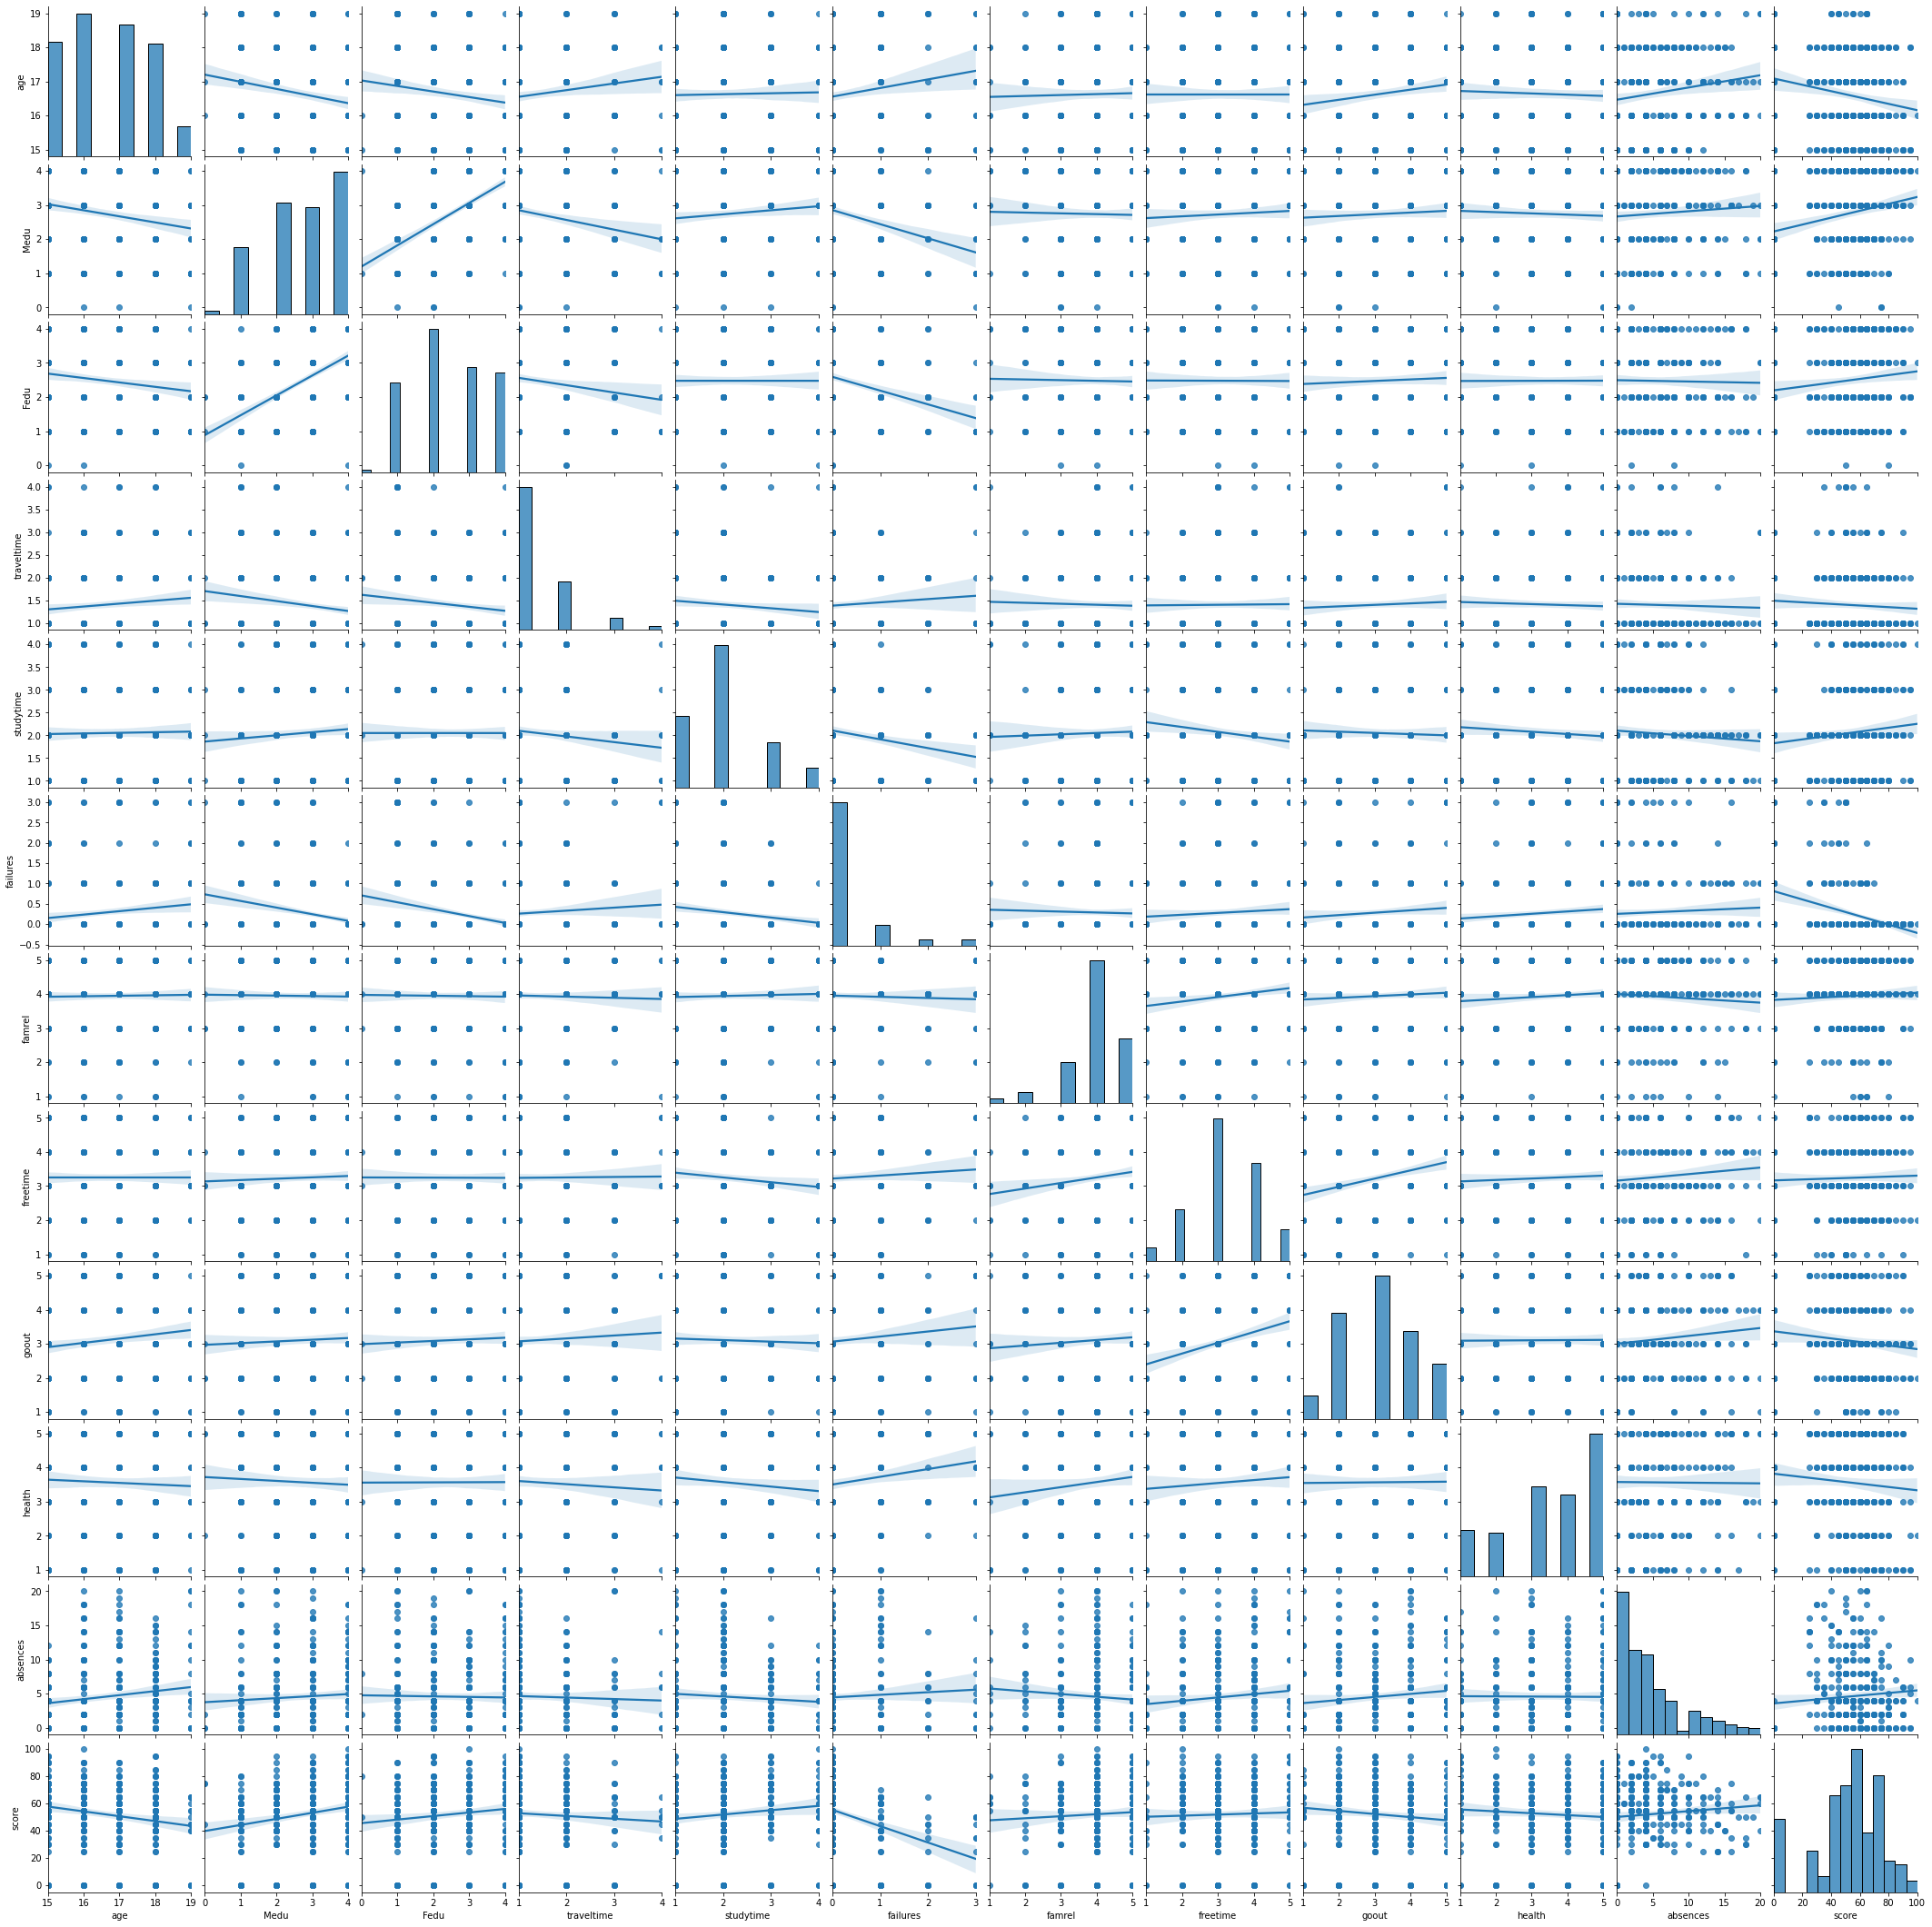

In [468]:
#КОРРЕЛЯЦИОННЫЙ АНАЛИЗ
#Выясним, какие столбцы коррелируют с баллами по госэкзамену по математике.
#Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить. 
#Корреляции рассмотрим только для числовых столбцов.
#Для быстрого построения графиков зависимости переменных можно воспользоваться функцией pairplot из модуля seaborn:
sns.pairplot(stud, kind = 'reg')
#Используем матрицу корреляций:
stud.corr()

#По результаатм анализа матрицы видим, что связи между параметрами слабые, на границе средних значений по связи с score находятся только Medu и failures,
# к не коррелирующим переменным относим переменные с коэффициентом менеее 0,1:
# это traveltime, famrel, freetime, health, absences.
#Для анализа остаются параметры - age, Medu, Fedu, studytime, failures, goout.

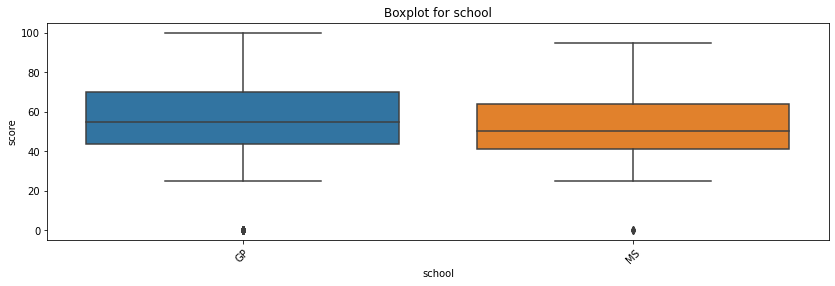

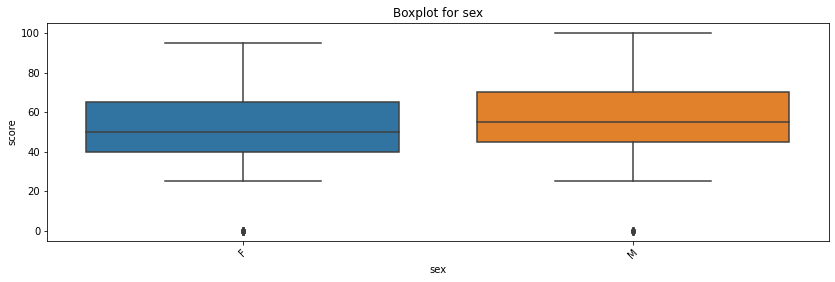

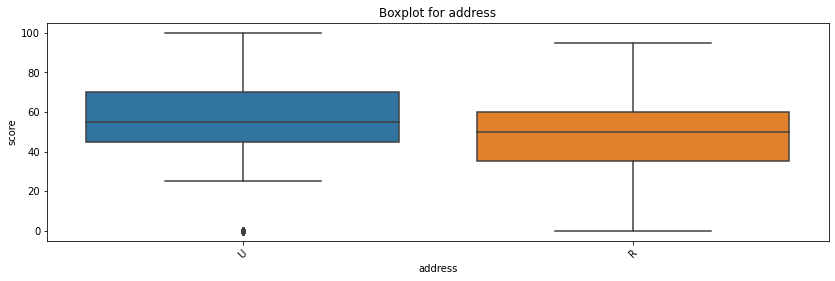

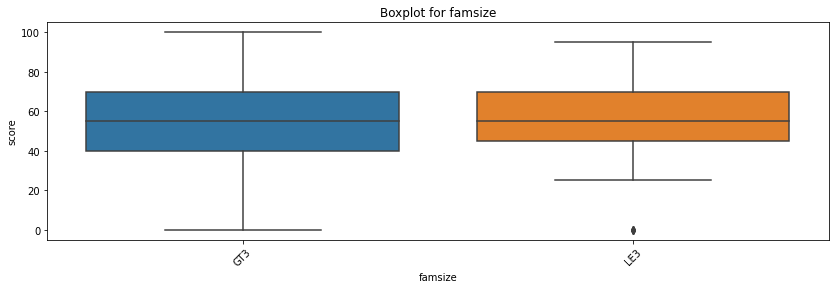

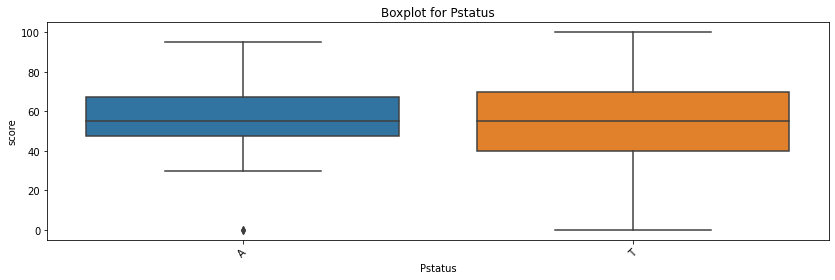

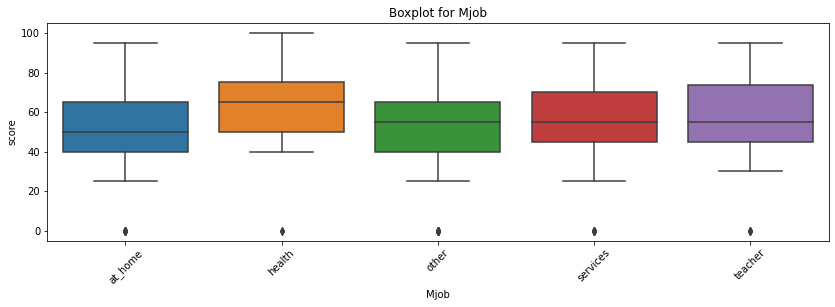

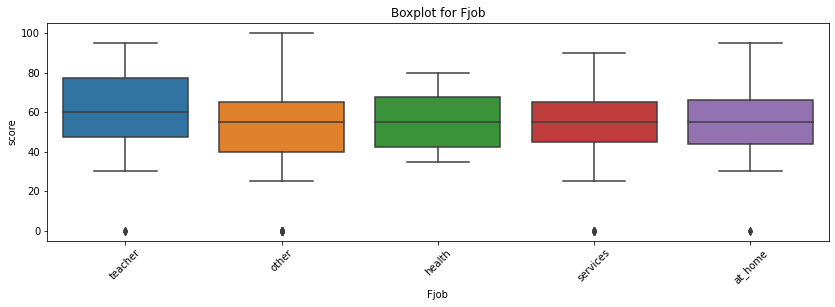

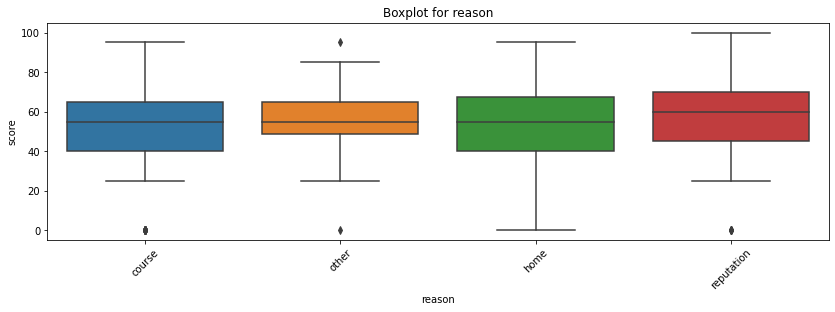

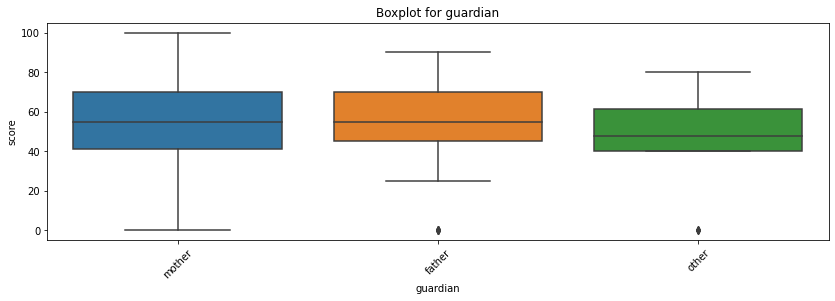

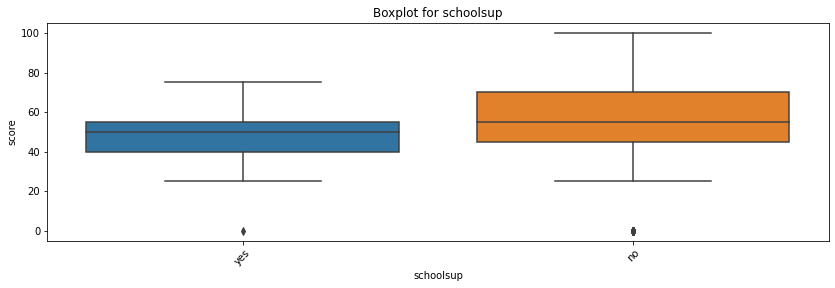

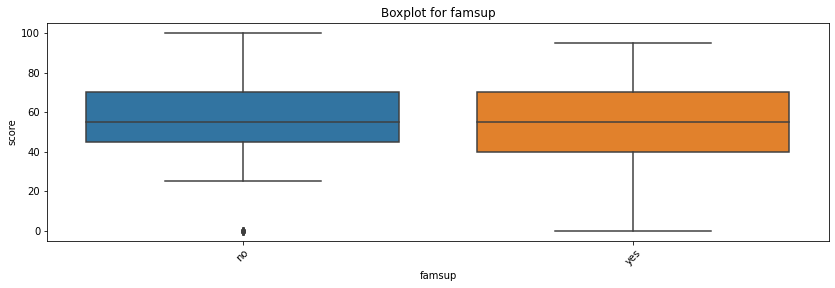

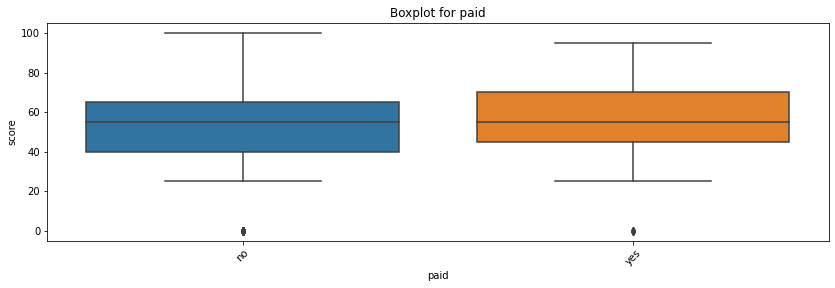

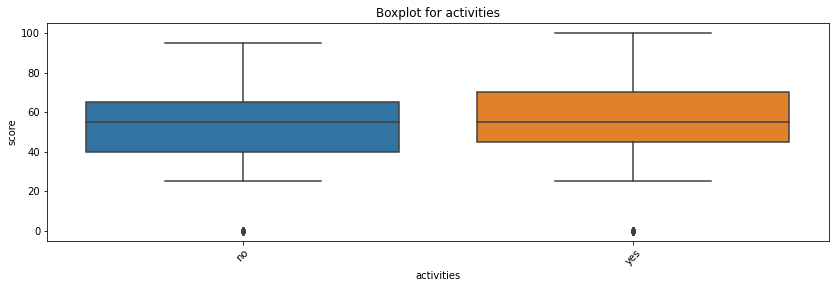

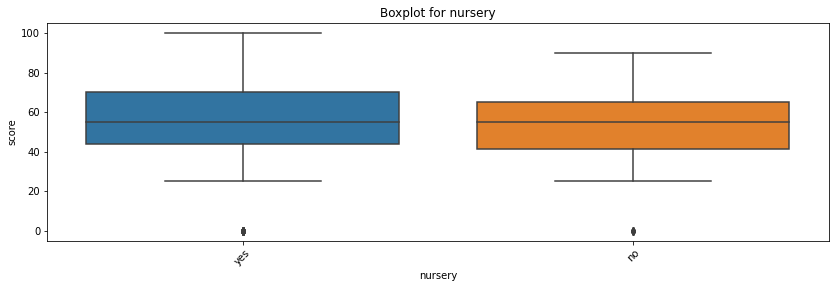

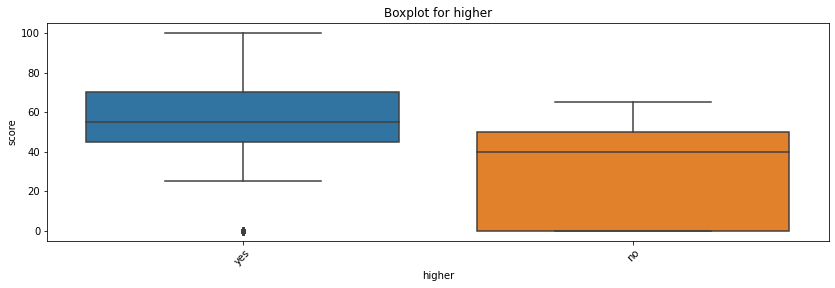

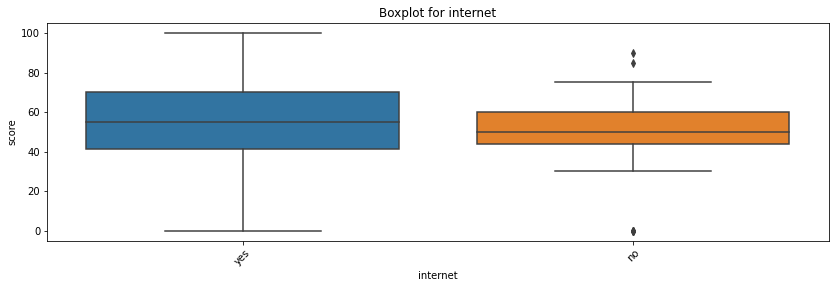

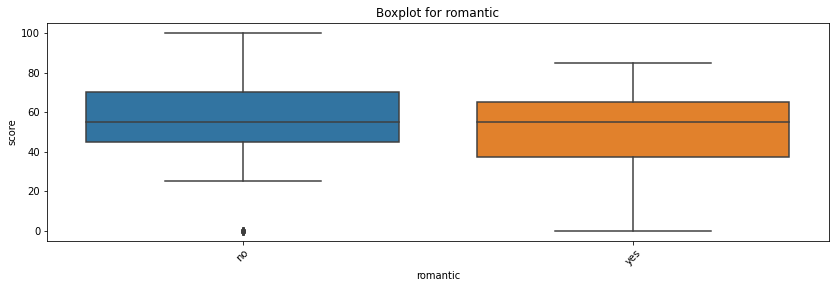

In [469]:
#Посмотрим, различаются ли распределения оценки в зависимости от значения номинативных переменных
#с помощью box-plot.

def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

for column in stud.columns:
    if stud[column].dtype == object:
        get_boxplot(column)
        

In [470]:
#Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам,
#с помощью теста Стьюдента. 

def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score'],nan_policy = 'omit').pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

            
for column in stud.columns:
    if stud[column].dtype == object:
        get_stat_dif(column)
    
#Как мы видим, серьёзно отличаются параметры: sex, address, paid, higher, romantic. 
#Оставим эти переменные в датасете для дальнейшего построения модели. 

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


In [471]:
#Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это:
#age, Medu, Fedu, studytime, failures, goout, sex, address, paid, higher, romantic.
stud_for_model = stud.loc[:, ['age','Medu','Fedu','studytime','failures','goout','sex','address','paid','higher','romantic']]
stud_for_model.head()

,age,Medu,Fedu,studytime,failures,goout,sex,address,paid,higher,romantic
0,18,4.0,4.0,2.0,0.0,4.0,F,U,no,yes,no
1,17,1.0,1.0,2.0,0.0,3.0,F,U,no,yes,no
2,15,1.0,1.0,2.0,3.0,2.0,F,U,no,yes,no
3,15,4.0,2.0,3.0,0.0,2.0,F,U,yes,yes,yes
4,16,3.0,3.0,2.0,0.0,2.0,F,U,yes,yes,no


In [472]:
#В результате EDA для анализа влияния параметров учащихся на их оценку на экзамене по математике
#были получены следующие выводы:
# 1.В данных достаточно мало пустых значений.
# 2.Выбросы найдены только в столбцах age, Fedu, famrel, absences, 
#что позволяет сделать вывод о том, что данные достаточно чистые.
# 3.Значительной корреляция параметров не выявлено.
# 4.Параметры, которые предлагается использовать в дальнейшем для построения модели,это
# age, Medu, Fedu, studytime, failures, goout, sex, address, paid, higher, romantic.